# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd

sinasc = pd.read_csv('Sinasc.csv')

print(sinasc.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
sinasc['APGAR5_categoria'] = pd.cut(sinasc['APGAR5'], bins=[0, 3, 5, 7, 10], labels=['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'])

print(sinasc[['APGAR5', 'APGAR5_categoria']].head())

   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

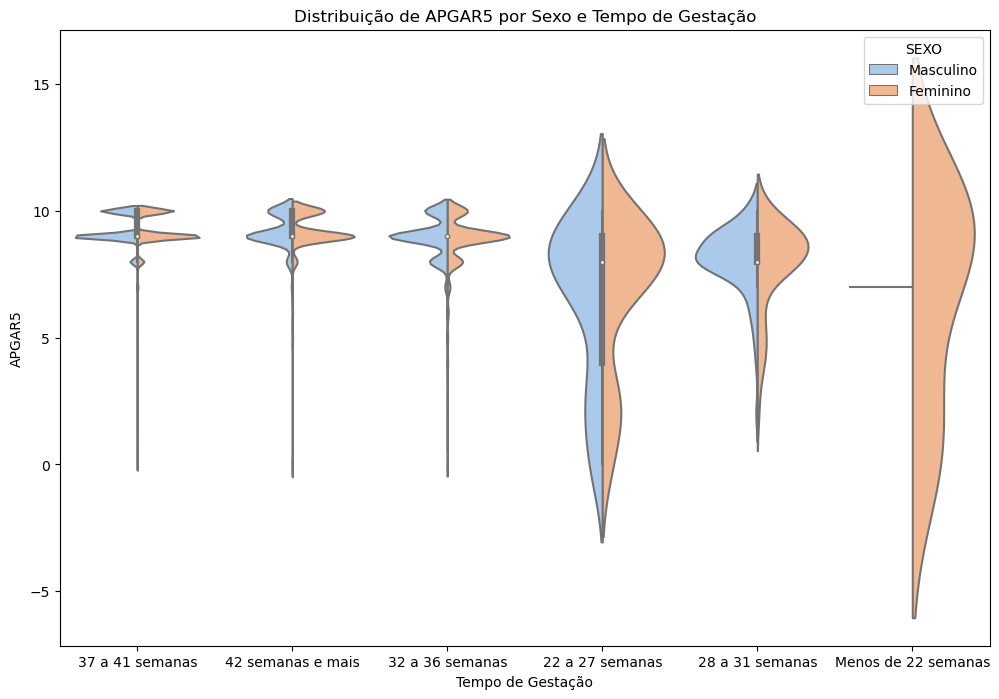

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc, palette='pastel', split=True)
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], margins=True, margins_name='Total')

print(tabela_cruzada)

APGAR5               0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0   8.0    9.0  \
GESTACAO                                                                   
22 a 27 semanas        7    0    8    6    1    0    2   10    24     19   
28 a 31 semanas        0    0    2    1    5    7    7   11    61     55   
32 a 36 semanas        2    2    2    2    8   11   17   56   362   1307   
37 a 41 semanas        5   20    3    5    7   21   45  151  1417  13565   
42 semanas e mais      1    0    0    0    0    1    1    5    44    423   
Menos de 22 semanas    1    0    1    0    0    0    0    1     0      3   
Total                 16   22   16   14   21   40   72  234  1908  15372   

APGAR5               10.0  Total  
GESTACAO                          
22 a 27 semanas         8     85  
28 a 31 semanas        13    162  
32 a 36 semanas       465   2234  
37 a 41 semanas      7284  22523  
42 semanas e mais     223    698  
Menos de 22 semanas     1      7  
Total                7994  25709  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], margins=True, margins_name='Total')

percentuais_linha = tabela_cruzada.div(tabela_cruzada['Total'], axis=0) 

print(percentuais_linha)

APGAR5                    0.0       1.0       2.0       3.0       4.0  \
GESTACAO                                                                
22 a 27 semanas      0.082353  0.000000  0.094118  0.070588  0.011765   
28 a 31 semanas      0.000000  0.000000  0.012346  0.006173  0.030864   
32 a 36 semanas      0.000895  0.000895  0.000895  0.000895  0.003581   
37 a 41 semanas      0.000222  0.000888  0.000133  0.000222  0.000311   
42 semanas e mais    0.001433  0.000000  0.000000  0.000000  0.000000   
Menos de 22 semanas  0.142857  0.000000  0.142857  0.000000  0.000000   
Total                0.000622  0.000856  0.000622  0.000545  0.000817   

APGAR5                    5.0       6.0       7.0       8.0       9.0  \
GESTACAO                                                                
22 a 27 semanas      0.000000  0.023529  0.117647  0.282353  0.223529   
28 a 31 semanas      0.043210  0.043210  0.067901  0.376543  0.339506   
32 a 36 semanas      0.004924  0.007610  0.025067 

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

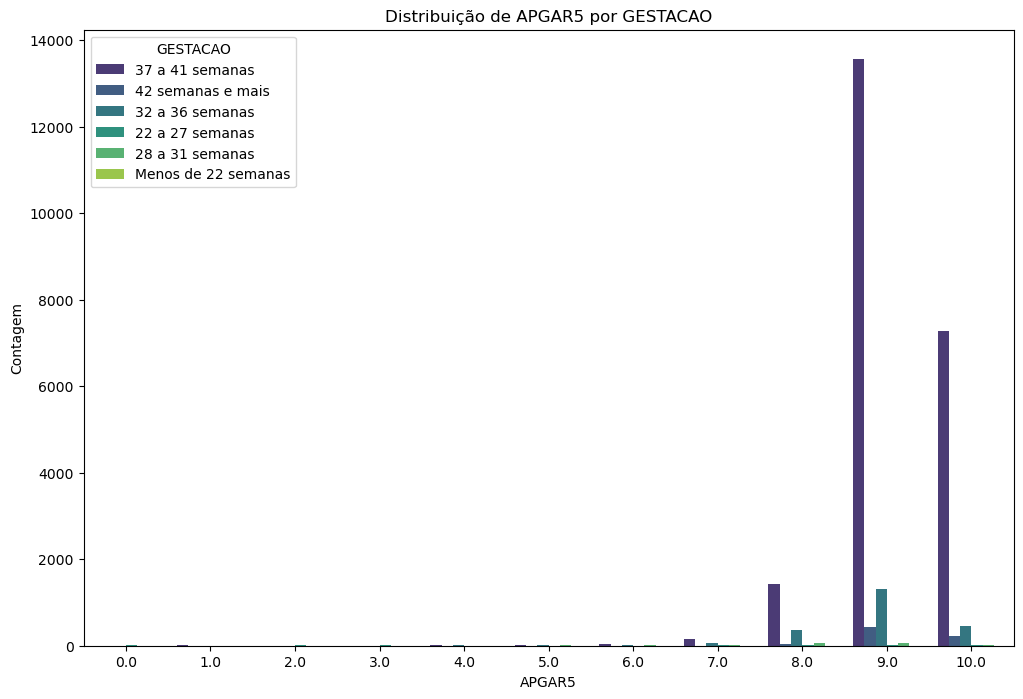

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='APGAR5', hue='GESTACAO', data=sinasc, palette='viridis')
plt.title('Distribuição de APGAR5 por GESTACAO')
plt.xlabel('APGAR5')
plt.ylabel('Contagem')
plt.show()

#Eu consideraria prematura com 31 semanas para baixo, não abaixo de 37. Vou fazer mais um teste abaixo...

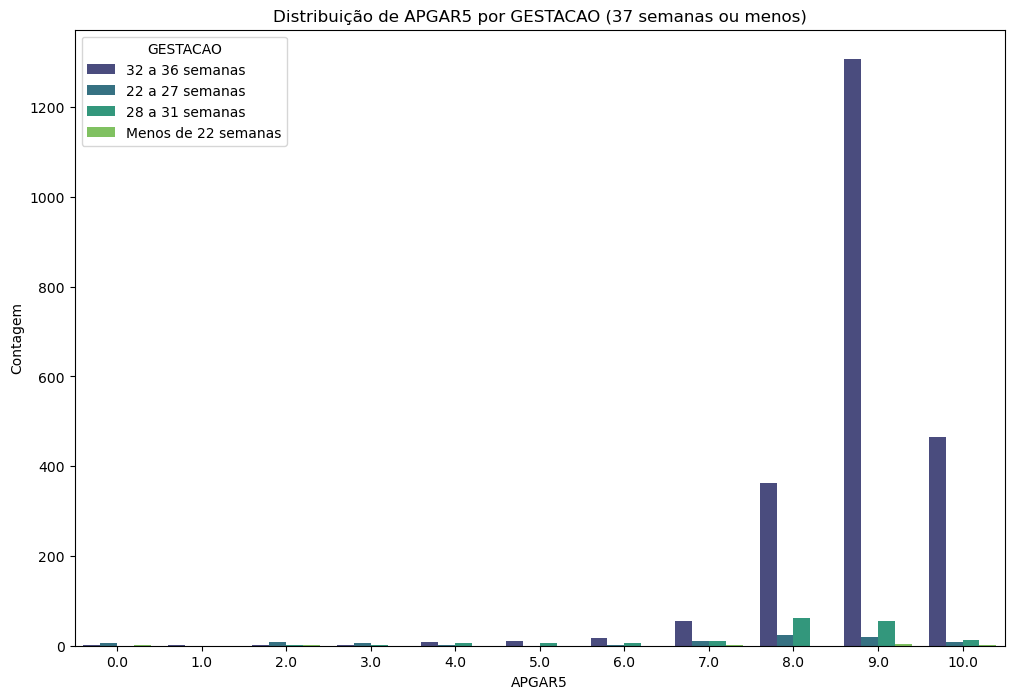

In [15]:
categorias_desejadas = ["Menos de 22 semanas", "22 a 27 semanas", "28 a 31 semanas", "32 a 36 semanas"]

plt.figure(figsize=(12, 8))
sns.countplot(x='APGAR5', hue='GESTACAO', data=sinasc[sinasc['GESTACAO'].isin(categorias_desejadas)], palette='viridis')
plt.title('Distribuição de APGAR5 por GESTACAO (37 semanas ou menos)')
plt.xlabel('APGAR5')
plt.ylabel('Contagem')
plt.show()

#Reiterando, acredito que há muita gestação com menos de 37 semanas com classificação boa de APGAR5. Poderia se considerar 
##prematuro um pouco abaixo de 37 semanas, talvez abaixo de 32 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

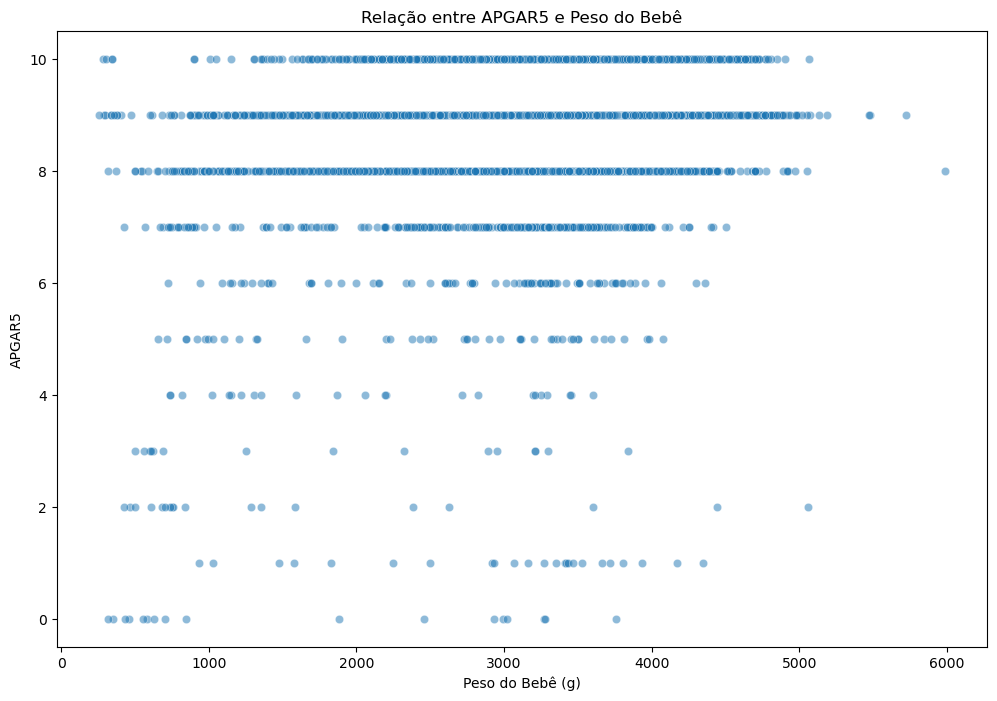

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PESO', y='APGAR5', data=sinasc, alpha=0.5)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5')
plt.show()
#Não parece haver uma correlação geral muito forte. Acredito que se fizéssemos um indíce de correlação, ele daria como existente
##mas fraca. Até mesmo no indíce 10, o range das maiores frequências é muito grande, sendo entre 2000 a 5000g. No indíce 9
###diverge mais ainda, então fica difícil considerar que há uma correçalação geral muito forte, talvez correlações parciais
####, vamos testar.

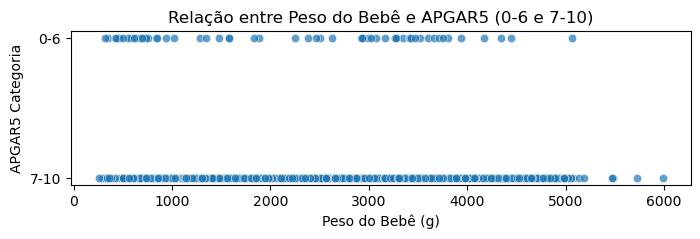

In [32]:
# Criar uma nova coluna 'APGAR_Categoria' com base nas categorias fornecidas
sinasc['APGAR_Categoria'] = pd.cut(sinasc['APGAR5'], bins=[-1, 3, 10], labels=['0-3', '4-10'], right=False)

# Criar uma nova coluna 'APGAR_Categoria_Somada' somando as categorias '0-3' e '4-10'
sinasc['APGAR_Categoria_Somada'] = sinasc['APGAR_Categoria'].replace({'0-3': '0-6', '4-10': '7-10'})

plt.figure(figsize=(8, 2))
sns.scatterplot(x='PESO', y='APGAR_Categoria_Somada', data=sinasc, alpha=0.7)
plt.title('Relação entre Peso do Bebê e APGAR5 (0-6 e 7-10)')
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5 Categoria')
plt.show()

#Nem em correlações parciais foi possível enxergar algo muito relevante. O que podemos ressaltar, é que a categoria de 0-6 
##possuem muitas crianças com peso entre 0 a 1000 e 3000 a 4000, mas nada que seja significativo para considerarmos como uma 
###tendência.